## 1. Import Library

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Read csv file using pandas

In [69]:
sales_df = pd.read_csv("./sales_data.csv")
sales_data_df = pd.DataFrame(sales_df)

## 3. Print the first 5 column

In [70]:
sales_data_df.head()

,OrderDate,ProductCategory,CustomerType,TotalSales,Quantity,UnitPrice
0,1/1/2023,Electronics,New,278.52,4,69.63
1,1/2/2023,Clothing,Returning,103.17,8,12.90
2,1/4/2023,Books,New,210.32,6,35.05
3,1/4/2023,Clothing,New,75.63,5,15.13
4,1/5/2023,Electronics,New,211.81,9,23.53


## 4. Information about the dataset

In [71]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderDate        30 non-null     object 
 1   ProductCategory  30 non-null     object 
 2   CustomerType     30 non-null     object 
 3   TotalSales       30 non-null     float64
 4   Quantity         30 non-null     int64  
 5   UnitPrice        30 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


### 5. Tidak ada null value di dalam dataset, dan jika ada kita bisa membuat if else statement untuk mengambil data yang diperlukan dan membiarkan null value tersebut. 

### 6. Pada dataset tersebut, semua kolom diperlukan untuk analisis, tetapi jika ingin menghapus suatu kolom kita bisa menggunakan metode .drop()

## 7. Distribution Analysis

Text(0.5, 1.0, 'Total Sales')

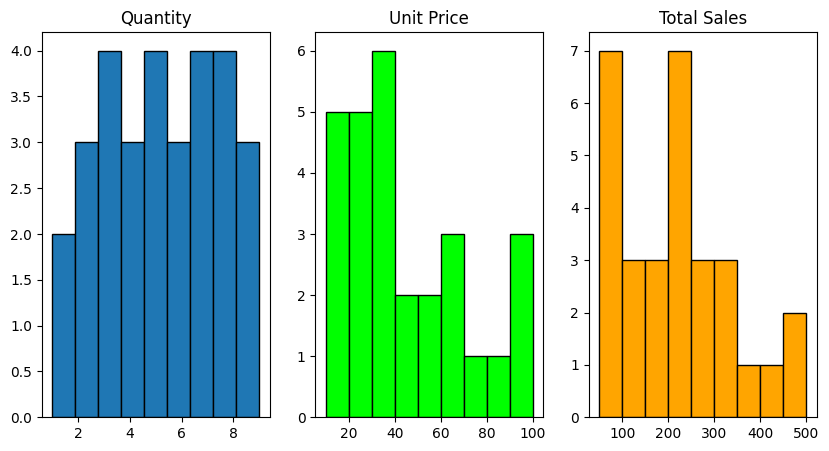

In [72]:
# make a new table for numerical data
numerical_data = sales_data_df[['Quantity','UnitPrice','TotalSales']]

hist_quantity = numerical_data['Quantity']
hist_unitprice = numerical_data['UnitPrice']
hist_totalsales = numerical_data['TotalSales']

# make frecuency for column unit price and total sales
bins_unitprice = [10,20,30,40,50,60,70,80,90,100]
bins_totsales = [50,100,150,200,250,300,350,400,450,500]

# make histogram for each column
fig, (x0, x1, x2) = plt.subplots(nrows=1, ncols=3, figsize= (10,5))

x0.hist(hist_quantity, bins=9, edgecolor = 'black')
x0.set_title('Quantity')

x1.hist(hist_unitprice, bins=bins_unitprice, color='lime', edgecolor = 'black')
x1.set_title('Unit Price')

x2.hist(hist_totalsales, bins=bins_totsales, color= 'orange', edgecolor = 'black')
x2.set_title('Total Sales')

### Count mean, median and standart deviation for each column

In [73]:
# Column Quantity
print(f"Mean: {hist_quantity.mean():.2f}")
print(f"Median: {hist_quantity.median():.2f}")
print(f"Standar Deviasi: {hist_quantity.std():.2f}")

Mean: 5.23
Median: 5.00
Standar Deviasi: 2.49


In [74]:
# Column UnitPrice
print(f"Mean: {hist_unitprice.mean():.2f}")
print(f"Median: {hist_unitprice.median():.2f}")
print(f"Standar Deviasi: {hist_unitprice.std():.2f}")

Mean: 48.99
Median: 38.55
Standar Deviasi: 30.27


In [75]:
# Column TotalSales
print(f"Mean: {hist_totalsales.mean():.2f}")
print(f"Median: {hist_totalsales.median():.2f}")
print(f"Standar Deviasi: {hist_totalsales.std():.2f}")

Mean: 215.94
Median: 206.50
Standar Deviasi: 124.07


### 8. Variable Correlation for numerical data

In [76]:
# make correlation for each variable in numerical data
x1 = numerical_data['Quantity']
x2 = numerical_data['UnitPrice']
x3 = numerical_data['TotalSales']

corr_x1x2 = np.corrcoef(x1, x2, rowvar=False) #correlation between x1 and x2
corr_x1x3 = np.corrcoef(x1, x3, rowvar=False) #correlation between x1 and x3
corr_x2x3 = np.corrcoef(x2, x3, rowvar=False) #correlation between x2 and x3

In [77]:
# print correlation result
corr_total = corr_x1x2,corr_x1x3,corr_x2x3
corr_total

(array([[ 1.      , -0.555767],
        [-0.555767,  1.      ]]),
 array([[1.        , 0.22976792],
        [0.22976792, 1.        ]]),
 array([[1.        , 0.59025435],
        [0.59025435, 1.        ]]))

### 9. Heatmap vizualitation

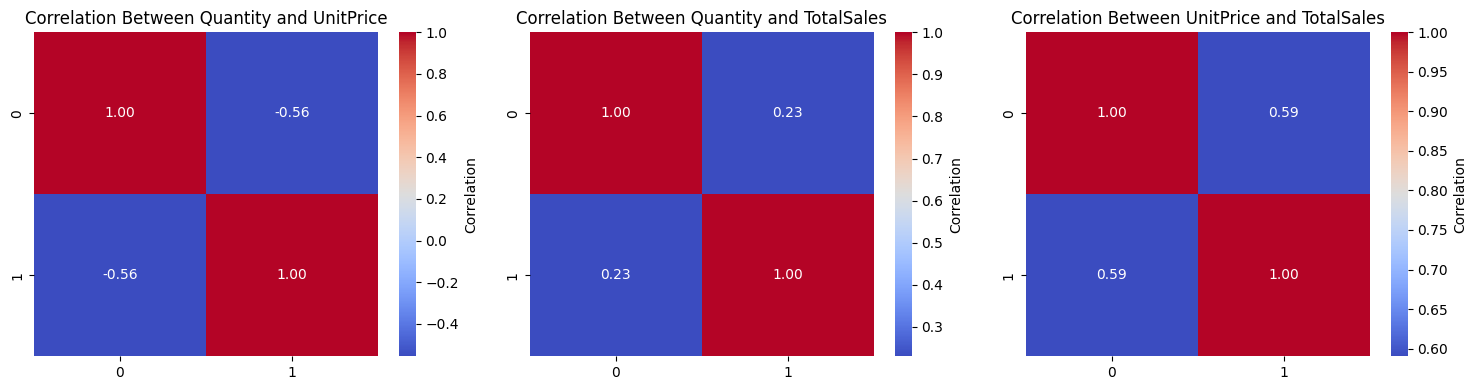

In [78]:
# Create subplots for each heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot heatmaps
sns.heatmap(corr_x1x2, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation Between Quantity and UnitPrice')

sns.heatmap(corr_x1x3, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Correlation Between Quantity and TotalSales')

sns.heatmap(corr_x2x3, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2], cbar_kws={'label': 'Correlation'})
axes[2].set_title('Correlation Between UnitPrice and TotalSales')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Axes: >

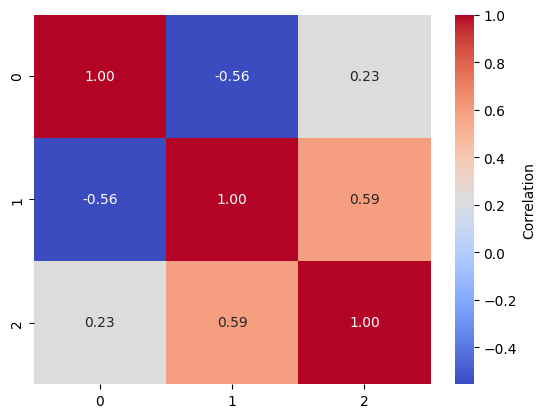

In [79]:
# Correlation for all three variable in numerical_data
corr = np.corrcoef(numerical_data, rowvar=False)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})

## 10. Data Categorical Analysis

In [80]:
# count total of each column in categorical data
categorical_data = sales_data_df[['ProductCategory','CustomerType']]
product = pd.DataFrame(categorical_data['ProductCategory'].value_counts())
product

,count
ProductCategory,
Electronics,10
Clothing,10
Books,10


In [81]:
customer = pd.DataFrame(categorical_data['CustomerType'].value_counts())
customer

,count
CustomerType,
New,17
Returning,13


Text(0.5, 1.0, 'Customer by Type')

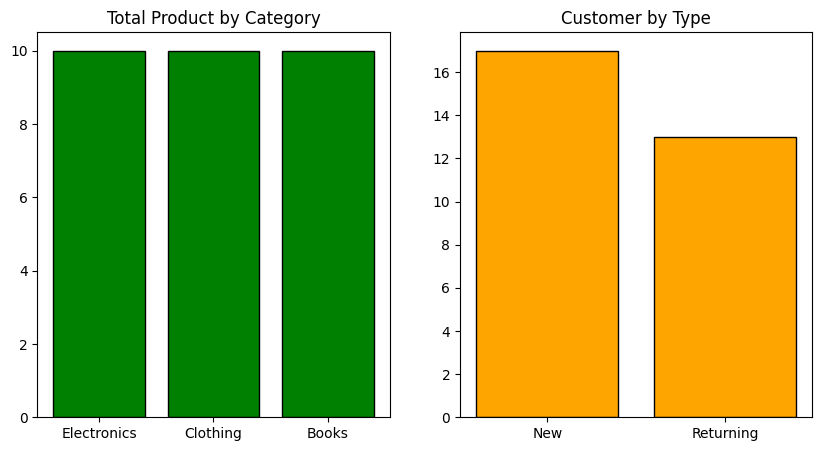

In [82]:
# make bar plot for each column in categorical data
fig, (chart1, chart2) = plt.subplots(nrows=1, ncols=2, figsize= (10,5))
index1 = ['Electronics','Clothing','Books']
index2 = ['New', 'Returning']

chart1.bar(index1, product['count'], color = 'green', edgecolor = 'black')
chart1.set_title('Total Product by Category')

chart2.bar(index2, customer['count'], color = 'orange', edgecolor = 'black')
chart2.set_title('Customer by Type')

## 11. Time Series Analysis

In [83]:
# Change the data type
convert = pd.to_datetime(sales_data_df['OrderDate'])
sales_data_df['OrderDate'] = pd.DataFrame(convert)

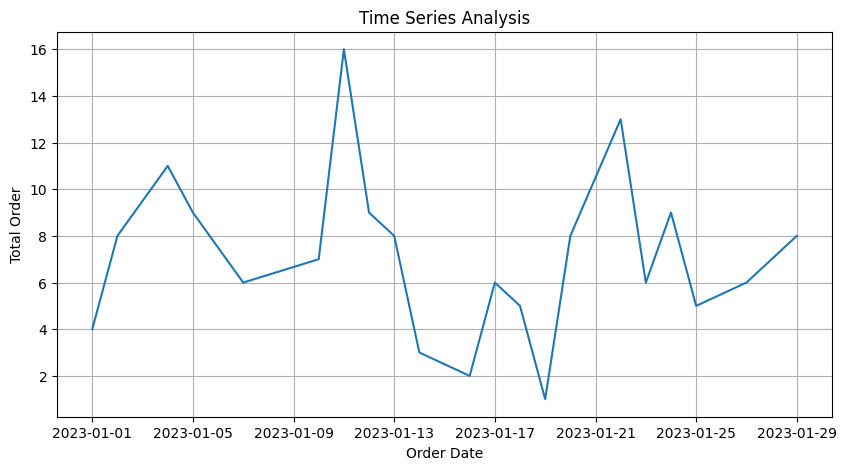

In [84]:
"""
    Pada kolom OrderDate, tahun maupun bulan yang digunakan pada semua data adalah serupa
    yaitu tahun 2023 dan bulan 1 atau Januari. Oleh karena itu, analisis time series saya
    terapkan pada rentang waktu 30 hari
"""
# Mengambil kolom yang digunakan untuk analisa
combine = sales_data_df[['OrderDate','Quantity']]

# Mengurutkan kolom Orderdate agar analisa yang dilakukan lebih teratur
new_data = pd.DataFrame(combine.sort_values(by='OrderDate'))

# Menjumlahkan nilai pada kolom Quantity jika terdapat tanggal yang sama pada kolom OrderDate
group_data = new_data.groupby('OrderDate', as_index=False)['Quantity'].sum()

# Make the line graph
plt.figure(figsize=(10,5))
plt.plot(group_data['OrderDate'], group_data['Quantity'])
plt.title('Time Series Analysis')
plt.xlabel('Order Date')
plt.ylabel('Total Order')
plt.grid(True)

## 12. Make a boxplot for TotalSales and UnitPrice column

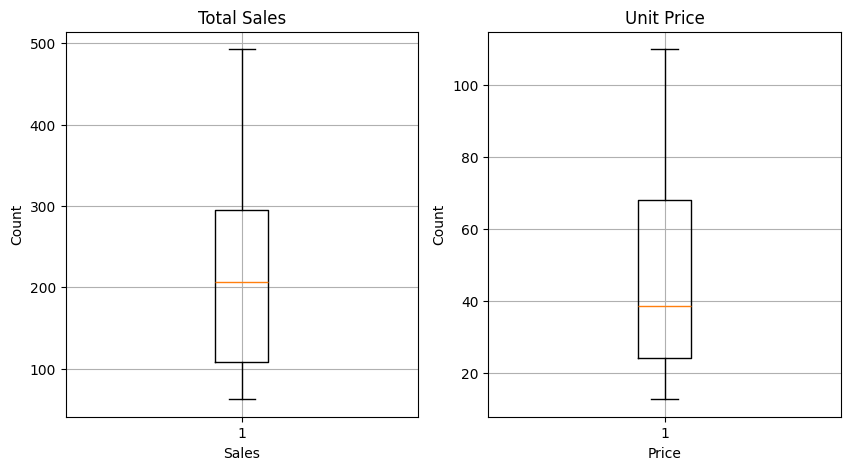

In [87]:
# Creating the boxplot
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
axis1.boxplot(numerical_data['TotalSales'])
axis2.boxplot(numerical_data['UnitPrice'])

# Adding labels, title and grid
axis1.set_xlabel('Sales')
axis1.set_ylabel('Count')
axis1.set_title('Total Sales')
axis1.grid(True)

axis2.set_xlabel('Price')
axis2.set_ylabel('Count')
axis2.set_title('Unit Price')
axis2.grid(True)


Berdasarkan boxplot tersebut, dapat diketahui bahwa tidak terdapat outlier pada data. Hal ini terbukti karena tidak terdapat titik-titik di luar dari nilai maksimum pada data.

In [86]:
print('Unit Price Column:')
print(f"Max value: {numerical_data['UnitPrice'].max()}")
print(f"Min value: {numerical_data['UnitPrice'].min()}\n")

print('Total Sales Column:')
print(f"Max value: {numerical_data['TotalSales'].max()}")
print(f"Min value: {numerical_data['TotalSales'].min()}")

Unit Price Column:
Max value: 109.83
Min value: 12.83

Total Sales Column:
Max value: 492.73
Min value: 62.34


Karena tidak terdapat outlier pada kedua kolom, maka batas atas dan bawah dari data Unit Price adalah 109.83 dan 12.83, sedangkan untuk Total Sales yaitu 492.73 dan 62.34

## 13. Conclusion of EDA result

a. Insight menarik yang dapat diperoleh dari data di atas yaitu analisis data menggunakan histogram pada kolom TotalSales  dan Quantity menunjukkan bahwa terdapat lebih dari satu modus dalam kedua data tersebut. Pada kolom quantity, terdapat 3 distribusi data yang memiliki nilai modus serupa sebesar 4 dan pada kolom totalsales terdapat 2 distribusi data dengan nilai modus serupa sebesar 7.

Hal ini menandakan bahwa terdapat distribusi data yang berkelompok sehingga membentuk lebih dari satu data puncak. Berdasarkan insight tersebut, dapat dilakukan pengambilan strategi yang tepat salah satu nya yaitu dengan memberikan pendekatan yang berbeda terhadap masing-masing kelompok data yang disesuaikan dengan prefrensi dari masing-masing kelompok data tersebut. Dengan begitu, setiap konsumen yang berada pada setiap kelompok data dapat merasakan kepuasan yang maksimal. 

b. Terdapat pola data yang cukup menarik pada grafik analisis time series antara kolom OrderDate dan Quantity. Pola data mengalami fluktuasi yang cukup tinggi. Hal ini dibuktikan dari grafik garis yang mengalami kenaikan serta penurunan yang cukup signifikan di setiap harinya. Kenaikan tertinggi terjadi pada tanggal 11 Januari 2023 dengan total pemesanan sebanyak 16 buah dan pemesanan terendah terjadi pada tangal 19 Januari 2023 sebanyak satu buah.

Dengan mengetahui tren dari grafik tersebut, strategi yang dapat kita lakukan adalah dengan melakukan berbagai cara agar fluktuasi data dapat ditekan hingga seminimal mungkin. Beberapa hal yang dapat dilakukan yaitu dengan memberikan promosi maupun diskon untuk menjaga loyalitas para konsumen serta terus melakukan inovasi terhadap produk yang kita miliki dengan mempelajari celah kelemahan para kompetitor.

c. Berdasarkan analisis korelasi yang dilakukan, terdapat hubungan yang menarik antar variabel pada tabel numerical_data. Korelasi tersebut dapat terlihat pada visualisasi data menggunakan heatmap. Dalam visualisasi tersebut, dapat diketahui bahwa terdapat korelasi yang berbeda-beda pada ketiga variabel tersebut. Pada korelasi pertama yaitu antara variabel Quantity dan Unit Price, terdapat hubungan yang cukup kuat dengan korelasi yang negatif antar keduanya. Hal ini berarti setiap terjadinya kenaikan pada jumlah produk yang dipesan akan mempengaruhi penurunan dari harga produk itu sendiri begitupun sebaliknya.

Berbeda dengan sebelumnya, pada analisis korelasi yang kedua yaitu terhadap Quantity dan Total Sales, terdapat hubungan atau korelasi positif yang lemah. Hal ini menandakan bahwa jumlah produk tidak memiliki pengaruh terhadap kenaikan maupun penurunan dari total penjualan begitu pula sebaliknya. Pada korelasi terakhir yaitu antar variabel Unit Price dan Total Sales, terdapat korelasi positif yang kuat antar keduanya. Hal ini menandakan bahwa setiap kenaikan yang terjadi pada harga produk, maka akan menaikkan total penjualan secara signifikan.